In [3]:
import pandas as pd
import numpy as np
import json

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [45]:
df = pd.read_csv('top_1000_pe_imports.csv', header=0, index_col=0)
df.head()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
hash,,,,,,,,,,,,,,,,,,,,,
071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.columns

Index(['GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError',
       'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle',
       'MultiByteToWideChar', 'GetCurrentThreadId',
       ...
       'bind', 'RegEnumKeyExA', 'WinHttpOpen', '_controlfp', 'WinExec',
       'GetSecurityDescriptorDacl', 'FindFirstFreeAce', 'GetTimeFormatW',
       'LookupAccountSidW', 'malware'],
      dtype='object', length=1001)

How many columns are a single value throughout all columns.

Throw it all into a blackbox.

In [236]:
df.malware.value_counts()

1    45651
0     1929
Name: malware, dtype: int64

In [248]:
df.describe()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware,goodware
count,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,...,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000
mean,0.872236,0.847079,0.760004,0.783459,0.770618,0.683501,0.665826,0.669966,0.756578,0.674107,...,0.024590,0.024401,0.024359,0.024275,0.024191,0.024149,0.023939,0.023686,0.959458,0.040542
std,0.333830,0.359915,0.427085,0.411891,0.420440,0.465115,0.471706,0.470230,0.429152,0.468713,...,0.154874,0.154292,0.154163,0.153903,0.153643,0.153513,0.152860,0.152072,0.197229,0.197229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X = df.drop('malware', axis=1)
y = df['malware']

In [62]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [65]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [69]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[  403   237]
 [   69 14993]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       640
           1       0.98      1.00      0.99     15062

    accuracy                           0.98     15702
   macro avg       0.92      0.81      0.86     15702
weighted avg       0.98      0.98      0.98     15702



=== All AUC Scores ===
[0.98748905 0.99164855 0.98902326 0.99146752 0.98471985 0.98930134
 0.98784058 0.98606257 0.98119676 0.98627823]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.987502771097214


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [72]:
# Create arrays for the features and the response variable
y = df['malware'].values
X = df.drop('malware', axis=1).values

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9735065596739269


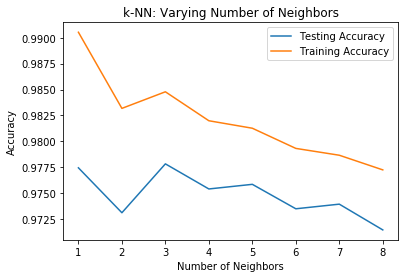

In [73]:
# Create arrays for the features and the response variable
y = df['malware'].values
X = df.drop('malware', axis=1).values

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [74]:
# Create arrays for the features and the response variable
y = df['malware'].values
X = df.drop('malware', axis=1).values

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9778372181887658


In [78]:
len(df)

47580

In [75]:
# finding sum over index axis 
# By default the axis is set to 0 
df.sum(axis = 0, skipna = True) 

GetProcAddress               41501
ExitProcess                  40304
WriteFile                    36161
GetLastError                 37277
CloseHandle                  36666
                             ...  
GetSecurityDescriptorDacl     1151
FindFirstFreeAce              1149
GetTimeFormatW                1139
LookupAccountSidW             1127
malware                      45651
Length: 1001, dtype: int64

In [100]:
# sum over the column axis. 
df_sums = df.sum(axis = 1, skipna = True) 

In [105]:
df_sums

hash
071e8c3f8922e186e57548cd4c703a5d    393
33f8e6d08a6aae939f25a8e0d63dd523    255
b68abd064e975e1c6d5f25e748663076     71
72049be7bd30ea61297ea624ae198067     60
c9b3700a77facf29172f32df6bc77f48    248
                                   ... 
9b917bab7f32188ae40c744f2be9aaf8    248
35a18ee05f75f04912018d9f462cb990    248
654139d715abcf7ecdddbef5a84f224b    248
078c9d4e7be4819a06974c6f292a4857    393
28a46c37f3a894f6d4ce8c38c2ff1fb1     62
Length: 47580, dtype: int64

In [104]:
max(df_sums

712

In [126]:
df_sum_values = []
for i in range(max(df_sums)):
    df_sum_values.append(sum(df_sums.values==i))

In [127]:
df_sum_values

[1,
 155,
 2928,
 52,
 222,
 76,
 238,
 173,
 166,
 209,
 154,
 154,
 175,
 206,
 233,
 726,
 354,
 861,
 205,
 121,
 548,
 261,
 452,
 30,
 43,
 45,
 48,
 22,
 36,
 36,
 45,
 54,
 41,
 41,
 64,
 103,
 155,
 231,
 975,
 16,
 40,
 36,
 172,
 33,
 32,
 34,
 31,
 36,
 22,
 21,
 22,
 35,
 22,
 22,
 24,
 30,
 50,
 35,
 45,
 44,
 59,
 61,
 50,
 62,
 61,
 142,
 575,
 486,
 345,
 639,
 366,
 194,
 206,
 116,
 153,
 136,
 352,
 355,
 458,
 340,
 202,
 512,
 180,
 275,
 176,
 90,
 75,
 182,
 76,
 88,
 91,
 110,
 219,
 145,
 147,
 76,
 56,
 59,
 94,
 557,
 678,
 55,
 67,
 49,
 52,
 166,
 199,
 143,
 26,
 113,
 36,
 36,
 42,
 119,
 74,
 32,
 84,
 34,
 18,
 98,
 24,
 75,
 119,
 12,
 35,
 33,
 22,
 12,
 26,
 20,
 11,
 19,
 28,
 26,
 19,
 24,
 12,
 20,
 34,
 19,
 9,
 9,
 19,
 13,
 24,
 17,
 11,
 7,
 29,
 6,
 16,
 39,
 46,
 69,
 138,
 1608,
 74,
 135,
 428,
 19,
 27,
 12,
 12,
 24,
 36,
 119,
 57,
 17,
 120,
 19,
 16,
 315,
 569,
 10,
 8,
 6,
 10,
 15,
 16,
 5,
 4,
 19,
 9,
 24,
 13,
 119,
 9,
 9,
 0,

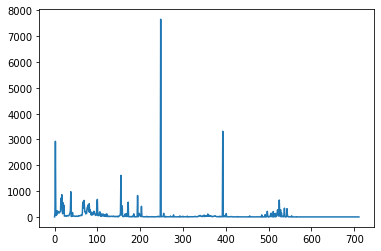

In [128]:
plt.plot(df_sum_values)

In [135]:
sum(df_sums.values==393)

3316

In [137]:
sum(df_sums.values==248)

7653

In [142]:
sum(df_sums.values==155)

1608

Looks like only 4 points have over 1000 hashes using that number of features. No idea what that means currently.
3, 155, 248, and 393

In [151]:
sum(df['malware'].values==0)

1929

In [152]:
sum(df['malware'].values==1)

45651

In [169]:
goodware = df.loc[df.malware == 0]

In [189]:
goodplot = goodware.sum(axis = 0, skipna = True).values/1929

In [172]:
malware = df.loc[df.malware == 1]

In [186]:
malplot = malware.sum(axis = 0, skipna = True).values/45651

In [192]:
from matplotlib.pyplot import figure

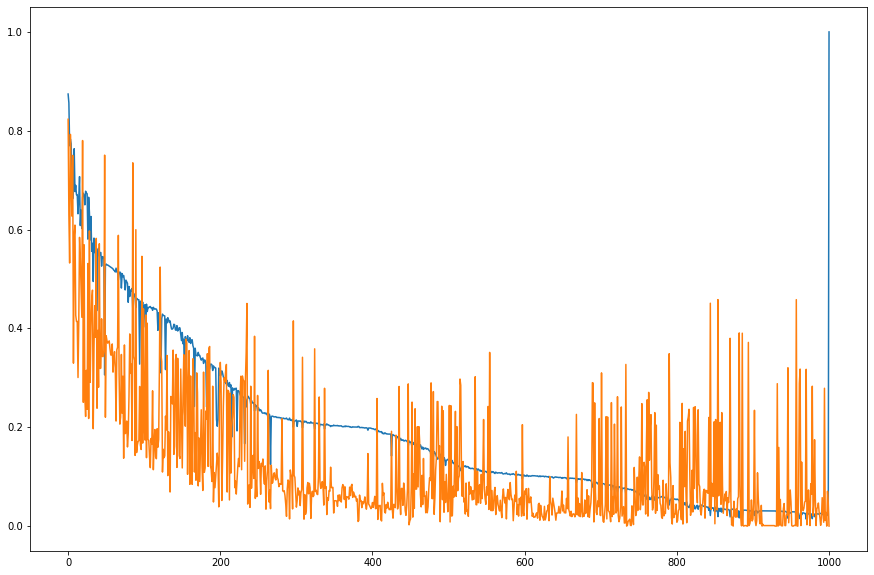

In [195]:
figure(figsize=(15,10))
plt.plot(malplot)
plt.plot(goodplot)
plt.show()

In [198]:
df_bool = df.astype('bool')

In [199]:
df_bool

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
hash,,,,,,,,,,,,,,,,,,,,,
071e8c3f8922e186e57548cd4c703a5d,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
33f8e6d08a6aae939f25a8e0d63dd523,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
b68abd064e975e1c6d5f25e748663076,True,True,True,True,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
72049be7bd30ea61297ea624ae198067,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
c9b3700a77facf29172f32df6bc77f48,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9b917bab7f32188ae40c744f2be9aaf8,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
35a18ee05f75f04912018d9f462cb990,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
654139d715abcf7ecdddbef5a84f224b,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47580 entries, 071e8c3f8922e186e57548cd4c703a5d to 28a46c37f3a894f6d4ce8c38c2ff1fb1
Columns: 1001 entries, GetProcAddress to malware
dtypes: int64(1001)
memory usage: 365.0+ MB


In [201]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47580 entries, 071e8c3f8922e186e57548cd4c703a5d to 28a46c37f3a894f6d4ce8c38c2ff1fb1
Columns: 1001 entries, GetProcAddress to malware
dtypes: bool(1001)
memory usage: 47.0+ MB


In [202]:
df_bool.columns

Index(['GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError',
       'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle',
       'MultiByteToWideChar', 'GetCurrentThreadId',
       ...
       'bind', 'RegEnumKeyExA', 'WinHttpOpen', '_controlfp', 'WinExec',
       'GetSecurityDescriptorDacl', 'FindFirstFreeAce', 'GetTimeFormatW',
       'LookupAccountSidW', 'malware'],
      dtype='object', length=1001)

In [203]:
# Import scale
from sklearn.preprocessing import scale

In [204]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [206]:
%%time

# Create arrays for the features and the response variable
y = df_bool['malware'].values
X = df_bool.drop('malware', axis=1).values

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.9724674232870955
Accuracy without Scaling: 0.9764606977721731
CPU times: user 16min 32s, sys: 2.77 s, total: 16min 35s
Wall time: 16min 38s


In [207]:
%%time

# Create arrays for the features and the response variable
y = df['malware'].values
X = df.drop('malware', axis=1).values

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.9724674232870955
Accuracy without Scaling: 0.9764606977721731
CPU times: user 16min 7s, sys: 1.68 s, total: 16min 8s
Wall time: 16min 11s


In [208]:
# Scale the features: X_scaled
X_scaled = scale(X)

In [209]:
print(X)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [210]:
print(X_scaled)

[[ 0.38272496  0.42488585  0.56194501 ... -0.15730988 -0.15660697
  -0.15575969]
 [ 0.38272496  0.42488585  0.56194501 ... -0.15730988 -0.15660697
  -0.15575969]
 [ 0.38272496  0.42488585  0.56194501 ... -0.15730988 -0.15660697
  -0.15575969]
 ...
 [ 0.38272496  0.42488585  0.56194501 ... -0.15730988 -0.15660697
  -0.15575969]
 [ 0.38272496  0.42488585  0.56194501 ... -0.15730988 -0.15660697
  -0.15575969]
 [ 0.38272496 -2.35357331 -1.77953355 ... -0.15730988 -0.15660697
  -0.15575969]]


In [217]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [218]:
%%time

# Create arrays for the features and the response variable
y = df_bool['malware'].values
X = df_bool.drop('malware', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.57%
CPU times: user 44.3 s, sys: 384 ms, total: 44.7 s
Wall time: 44.8 s


In [219]:
%%time

# Create arrays for the features and the response variable
y = df_bool['malware'].values
X = df_bool.drop('malware', axis=1).values

# Scale the features: X_scaled
X_scaled = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with scaling: %.2f%%" % (accuracy * 100.0))

Accuracy with scaling: 97.57%
CPU times: user 43.3 s, sys: 2.57 s, total: 45.9 s
Wall time: 46 s


In [220]:
%%time

# Create arrays for the features and the response variable
y = df_bool['malware'].values
X = df_bool.drop('malware', axis=1).values

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.9770386717108028
Accuracy without Scaling: 0.9759352669188734
CPU times: user 17min 22s, sys: 1.02 s, total: 17min 23s
Wall time: 17min 27s


In [222]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [227]:
%%time

# Importing the dataset
y = df['malware'].values
X = df.drop('malware', axis=1).values
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

#Prediction
y_pred=clf.predict(x_test)

    
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
accuracy=accuracy_score(y_pred,y_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [237]:
df.head()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
hash,,,,,,,,,,,,,,,,,,,,,
071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [238]:
df['goodware']=np.where(df['malware']==1,0,1)

In [239]:
df_good = df.drop('malware', axis=1)

In [240]:
df_good.head()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,goodware
hash,,,,,,,,,,,,,,,,,,,,,
071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [241]:
%%time

# Create arrays for the features and the response variable
y = df_good['goodware'].values
X = df_good.drop('goodware', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.57%
CPU times: user 45.3 s, sys: 725 ms, total: 46.1 s
Wall time: 46.2 s


In [244]:
list(df.columns)

['GetProcAddress',
 'ExitProcess',
 'WriteFile',
 'GetLastError',
 'CloseHandle',
 'FreeLibrary',
 'Sleep',
 'GetStdHandle',
 'MultiByteToWideChar',
 'GetCurrentThreadId',
 'FindClose',
 'LeaveCriticalSection',
 'EnterCriticalSection',
 'VirtualAlloc',
 'DeleteCriticalSection',
 'WideCharToMultiByte',
 'RegCloseKey',
 'ReadFile',
 'SetFilePointer',
 'GetCurrentProcess',
 'GetACP',
 'UnhandledExceptionFilter',
 'RaiseException',
 'RtlUnwind',
 'TlsGetValue',
 'TlsSetValue',
 'GetModuleHandleW',
 'GetCPInfo',
 'GetCurrentProcessId',
 'VirtualFree',
 'GetDC',
 'GetModuleFileNameW',
 'CreateFileW',
 'SetEndOfFile',
 'SetLastError',
 'GetCommandLineW',
 'DestroyWindow',
 'QueryPerformanceCounter',
 'VirtualQuery',
 'ShowWindow',
 'GetFileType',
 'TerminateProcess',
 'HeapFree',
 'HeapAlloc',
 'CreateThread',
 'BeginPaint',
 'EndPaint',
 'GlobalAlloc',
 'GetModuleHandleA',
 'GetCommandLineA',
 'GetWindowRect',
 'DeleteObject',
 'SetWindowPos',
 'GetClientRect',
 'SelectObject',
 'LoadLibrary

In [ ]:
getlist = []
for i in range(len(df.columns)):
    if df.columns[i] 
    getlist.append(df.column[i])
getlist.append

In [245]:
df.columns[3]

'GetLastError'